In [3]:
import pandas as pd
import numpy as np

In [4]:
adv_data = pd.read_csv('advertising.csv')
adv_data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [7]:
X = np.matrix(adv_data.ix[:,['TV', 'Radio', 'Newspaper']])
y = np.array(adv_data.Sales)

means, stds = np.mean(X, axis=0, keepdims=True), np.std(X, axis=0, keepdims=True)
print(means, stds)

X = (X - means) / stds

means, stds = np.mean(X, axis=0, keepdims=True), np.std(X, axis=0, keepdims=True)
print(means, stds)

X = np.hstack((np.ones((X.shape[0], 1)), X))

[[ 147.0425   23.264    30.554 ]] [[ 85.63933176  14.80964564  21.72410606]]
[[  1.22124533e-16  -4.52970994e-16   2.22044605e-16]] [[ 1.  1.  1.]]


$$\frac{1}{\ell}\sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}^2} \rightarrow \min_{w_0, w_1, w_2, w_3}$$

In [8]:
def ms_error(y, y_pred):
    return np.mean(np.power((y - y_pred),2))

In [9]:
y_median = np.median(y)
print(y_median)

y_median_error = ms_error(y, y_median)
print(y_median_error)

12.9
28.34575


$$w = {(X^TX)}^{-1}X^Ty$$

In [10]:
def normal_equation(X, y):
    return np.linalg.inv(np.transpose(X).dot(X)).dot(np.transpose(X)).dot(y)

In [11]:
norm_eq_weights = normal_equation(X, y)
print(norm_eq_weights)

[[ 14.0225       3.91925365   2.79206274  -0.02253861]]


In [12]:
sales_zeros = norm_eq_weights[0, 0] + norm_eq_weights[0, 1:].dot(means.transpose())
print(sales_zeros)

[[ 14.0225]]


In [13]:
def linear_prediction(X, w):
    return X.dot(w.transpose())

In [14]:
sales_pred = linear_prediction(X, norm_eq_weights)
ms_error(y, sales_pred)

51.38736118548907

In [35]:
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    grad = lambda i: 2 * np.mean(X[train_ind, i] * (w.dot(X[train_ind].transpose()) - y[train_ind])) 
    return  w - eta * np.array([grad(i) for i in range(X.shape[1])])

In [36]:
def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e4,
                                min_weight_dist=1e-8, seed=42, verbose=False):
 
    weight_dist = np.inf
    w = w_init
    errors = []
    iter_num = 0
    np.random.seed(seed)

    while weight_dist > min_weight_dist and iter_num < max_iter:
        random_ind = np.random.randint(X.shape[0])
        
        w_new = stochastic_gradient_step(X, y, w, random_ind, eta)
        errors.append(ms_error(y, linear_prediction(X, w_new)))
        weight_dist = np.linalg.norm(w_new - w)
        
        w = w_new
        iter_num += 1
        
    return w, errors

In [37]:
%%time
sgd_weights, sgd_errors_by_iter = stochastic_gradient_descent(X, y, np.zeros(X.shape[1]), max_iter=10**5)

Wall time: 34.3 s


Populating the interactive namespace from numpy and matplotlib


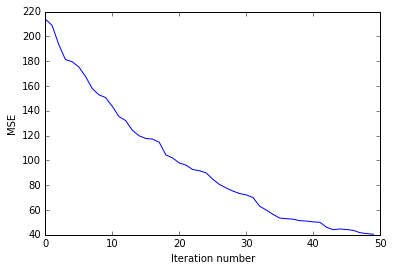

In [38]:
%pylab inline
plot(range(50), sgd_errors_by_iter[:50])
xlabel('Iteration number')
ylabel('MSE')

Populating the interactive namespace from numpy and matplotlib


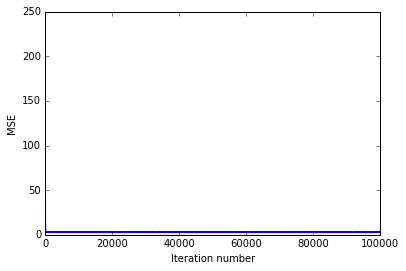

In [39]:
%pylab inline
plot(range(len(sgd_errors_by_iter)), sgd_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')

In [40]:
print('weights:', sgd_weights)

weights: [ 13.97836994   3.87934503   3.14134212   0.18323907]


In [41]:
print('mse:', sgd_errors_by_iter[-1])

mse: 3.0004502471
